<a href="https://colab.research.google.com/github/Rogerio-mack/IA/blob/main/PF_IA_2022S2_Glasses_Classification_solucao1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **PF IA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
df = pd.read_csv('https://github.com/Rogerio-mack/IA_2022S2/raw/main/glasses.txt')
df.head()

,Id number,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1,1.52101,13.64,D,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,D,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,C,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,D,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,D,1.24,73.08,0.55,8.07,0.0,0.0,1


# Classificação de Tipos de Vidro 

Vidros de podem ser classificados 7 categorias conforme suas características químicas:

* Classe 1: janelas de construção (processadas com flutuação)
* Classe 2: janelas de construção (processadas sem flutuação)
* Classe 3: janelas do veículo (processadas com flutuação)
* Classe 4: janelas do veículo (processadas sem flutuação)
* Classe 5: recipientes
* Classe 6: talheres
* Classe 7: faróis

(*algumas classes podem não estar presentes no data-set*).

## Exercício A

Aqui interessa podermos classificar os vidros para efeito de reciclagem em 2 categorias:

* **V = Vidros de Veículos**
* **N = Outros**

(\*) *Faróis, considere como vidros de veículos.*

Faça as seguintes transformações nos dados para obter os conjuntos `X` e `y` para classificação>


0. Recode das classes de saída para 'V' e 'N'
1. Excluir dados inapropriados para o uso em modelos
2. Fazer hot-encode dos dados categóricos
3. Verificar a presença de valores ausentes (neste caso, se presentes, elimine os registros)
4. Normalizar os dados


In [ ]:
# 0. Recode das classes de saída para 'V' e 'N'

df['Reciclavel'] = 1
df.loc[
    (df['Type of glass'] == 3) | 
    (df['Type of glass'] == 4) | 
    (df['Type of glass'] == 7), 'Reciclavel'] = 0

In [ ]:
# 1. Excluir dados inapropriados para o uso em modelos

df = df[['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Reciclavel']]

In [ ]:
# 2. Fazer hot-encode dos dados categóricos

from sklearn.preprocessing import OneHotEncoder, LabelEncoder

hot_encode = OneHotEncoder(handle_unknown='ignore') 
hot_encode = hot_encode.fit(df[['Mg']])
transformed = hot_encode.transform(df[['Mg']]).toarray()


transformed_df = pd.DataFrame(transformed, columns=hot_encode.get_feature_names_out())

df = pd.concat([df, transformed_df],axis=1) 

df = df[df.columns.drop('Mg')]

In [ ]:
# 3. Verificar a presença de valores ausentes (neste caso, se presentes, elimine os registros)
df = df.dropna().reset_index(drop=True)
display(df.isnull().sum())

RI            0
Na            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
Reciclavel    0
Mg_A          0
Mg_B          0
Mg_C          0
Mg_D          0
dtype: int64

In [ ]:
# 4. Normalizar os dados

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['RI', 'Na', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Mg_A', 'Mg_B', 'Mg_C',
       'Mg_D', ]]
y = df['Reciclavel']

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

## Exercício B

Aplique agora quaisquer 2 modelos de Classificação sobre os dados normalizados (lembre-se de excluir o atributo original Type of glass). Indique o melhor modelo justificando sua análise com base na acuracidade e na matriz de confusão dos modelos sobre o conjunto de teste.

Accuracy on training set: 0.84
Accuracy on test set: 0.88


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


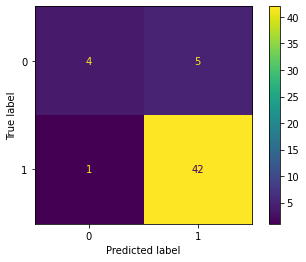

In [ ]:
#Modelo 1

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

mlp = MLPClassifier(hidden_layer_sizes=(8), random_state=1)

mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

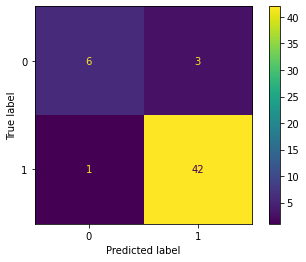

Accuracy on training set: 0.89
Accuracy on test set: 0.92


In [ ]:
#Modelo 2

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred)).plot()
plt.grid(False)
plt.show()

print("Accuracy on training set: {:.2f}".format(clf.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(clf.score(X_test, y_test)))

Basicamente podemos observar o mesmo resultado nas duas aplicações, portanto, não houve significativa diferença entre os modelos